<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/18_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# LSTM을 이용한 로이터 뉴스 카테고리 분류하기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

2110848/2110848 [==============================] - 1s 0us/step


((8982,), (8982,), (2246,), (2246,))

In [4]:
# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 단어 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [6]:
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 27s 52ms/step - loss: 2.2240 - accuracy: 0.4411 - val_loss: 1.9051 - val_accuracy: 0.5343
Epoch 2/200
450/450 [==============================] - 7s 15ms/step - loss: 1.8034 - accuracy: 0.5326 - val_loss: 1.7232 - val_accuracy: 0.5552
Epoch 3/200
450/450 [==============================] - 6s 13ms/step - loss: 1.6300 - accuracy: 0.5815 - val_loss: 1.5631 - val_accuracy: 0.6042
Epoch 4/200
450/450 [==============================] - 5s 12ms/step - loss: 1.4613 - accuracy: 0.6259 - val_loss: 1.4184 - val_accuracy: 0.6389
Epoch 5/200
450/450 [==============================] - 4s 10ms/step - loss: 1.3217 - accuracy: 0.6646 - val_loss: 1.3489 - val_accuracy: 0.6634
Epoch 6/200
450/450 [==============================] - 5s 10ms/step - loss: 1.2070 - accuracy: 0.6972 - val_loss: 1.2904 - val_accuracy: 0.6750
Epoch 7/200
450/450 [==============================] - 4s 8ms/step - loss: 1.0907 - accuracy: 0.7234 - val_loss: 1.2500 - val_accuracy:

In [9]:
print("Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 5ms/step - loss: 1.2407 - accuracy: 0.7293
Test Accuracy: 0.7293


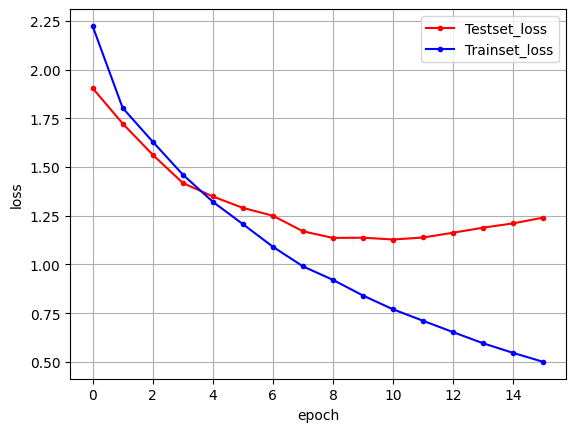

In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
from tensorflow.keras.datasets import reuters, imdb
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(x_train, maxlen=500)
X_test = sequence.pad_sequences(x_test, maxlen=500)

In [25]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=100,
                    batch_size=40, callbacks=[early_stopping_callback])

print("Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 37s 73ms/step - loss: 0.4078 - accuracy: 0.8046 - val_loss: 0.2819 - val_accuracy: 0.8861
Epoch 2/100
469/469 [==============================] - 18s 39ms/step - loss: 0.2414 - accuracy: 0.9070 - val_loss: 0.2700 - val_accuracy: 0.8864
Epoch 3/100
469/469 [==============================] - 12s 27ms/step - loss: 0.1926 - accuracy: 0.9275 - val_loss: 0.2831 - val_accuracy: 0.8829
Epoch 4/100
469/469 [==============================] - 9s 20ms/step - loss: 0.1551 - accuracy: 0.9433 - val_loss: 0.3152 - val_accuracy: 0.8816
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3220 - accuracy: 0.8803
Accuracy: 0.8803


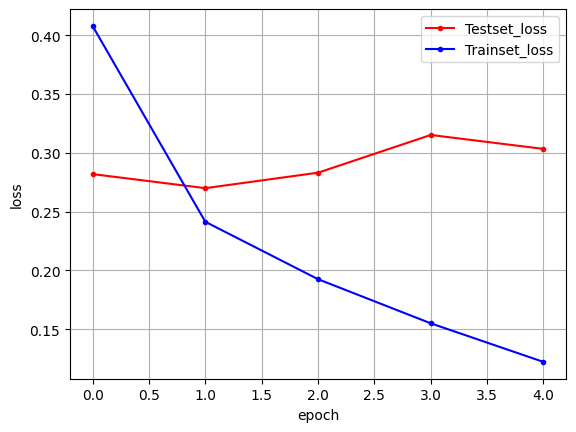

In [27]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
!pip install Attention

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_5 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_2 (Attention)     (None, 128)               20480     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2665249 (10.17 MB)
Trainable params: 266

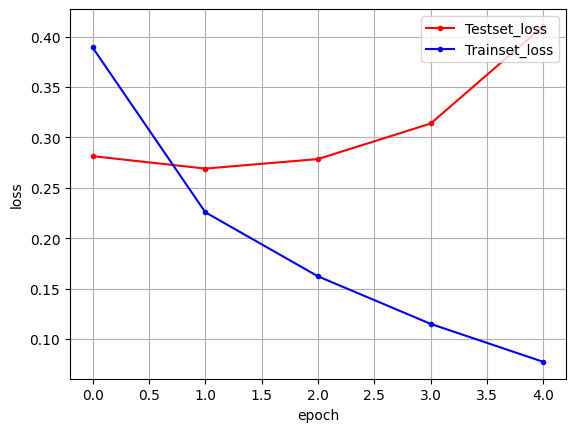

In [34]:
# 어텐션을 사용한 신경망
from tensorflow.keras.datasets import reuters, imdb
from tensorflow.keras.layers import Embedding, Dense, Flatten, LSTM, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
                    batch_size=40, callbacks=[early_stopping_callback])

print("Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()